# IRIS FLOWER CLASSIFICATION 

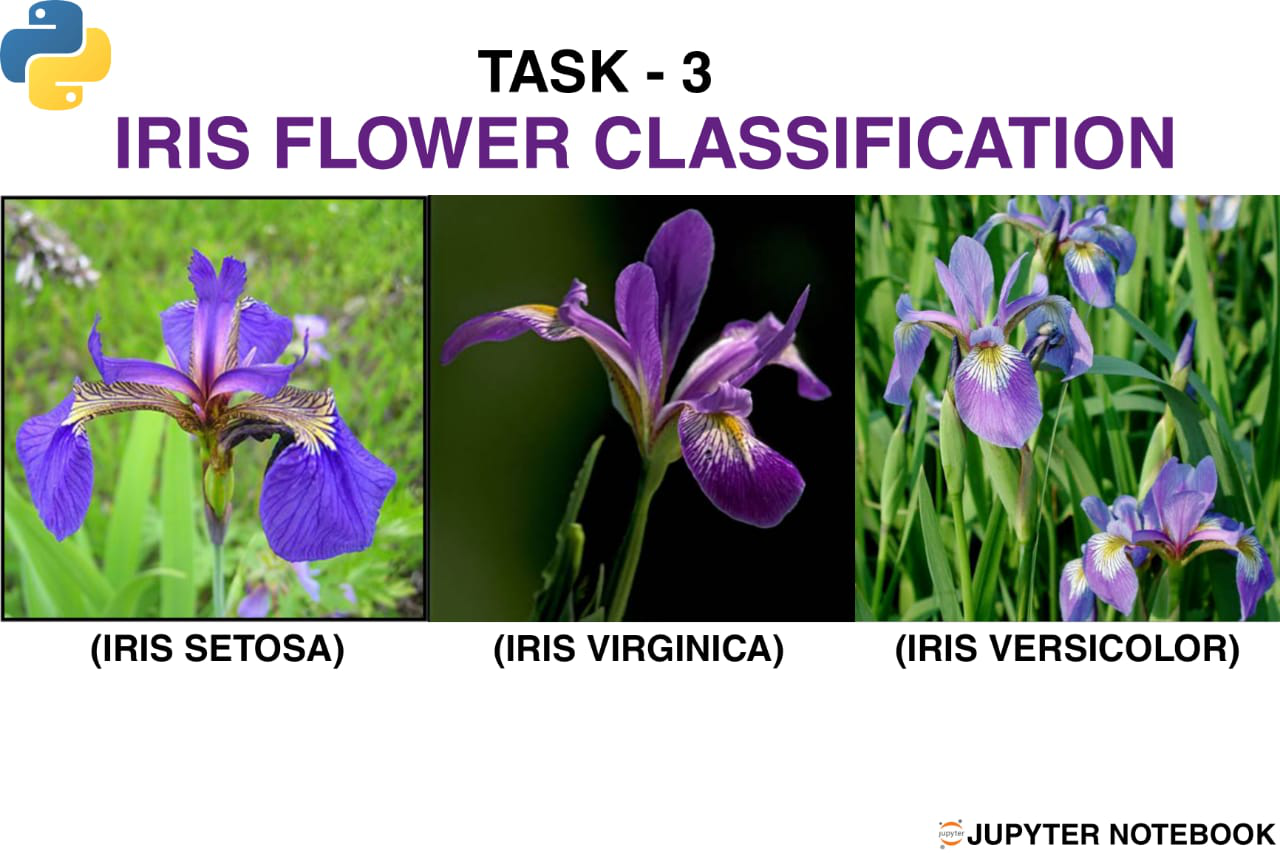

In [2]:
from IPython.display import display
from PIL import Image
image_path = "IRIS.jpg"
img = Image.open(image_path)
display(img)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
iris = pd.read_csv(r"C:\Users\shubh\Downloads\CodSoft Internship\Task - 3\IRIS.csv")
print(iris['species'].unique()) 
iris

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


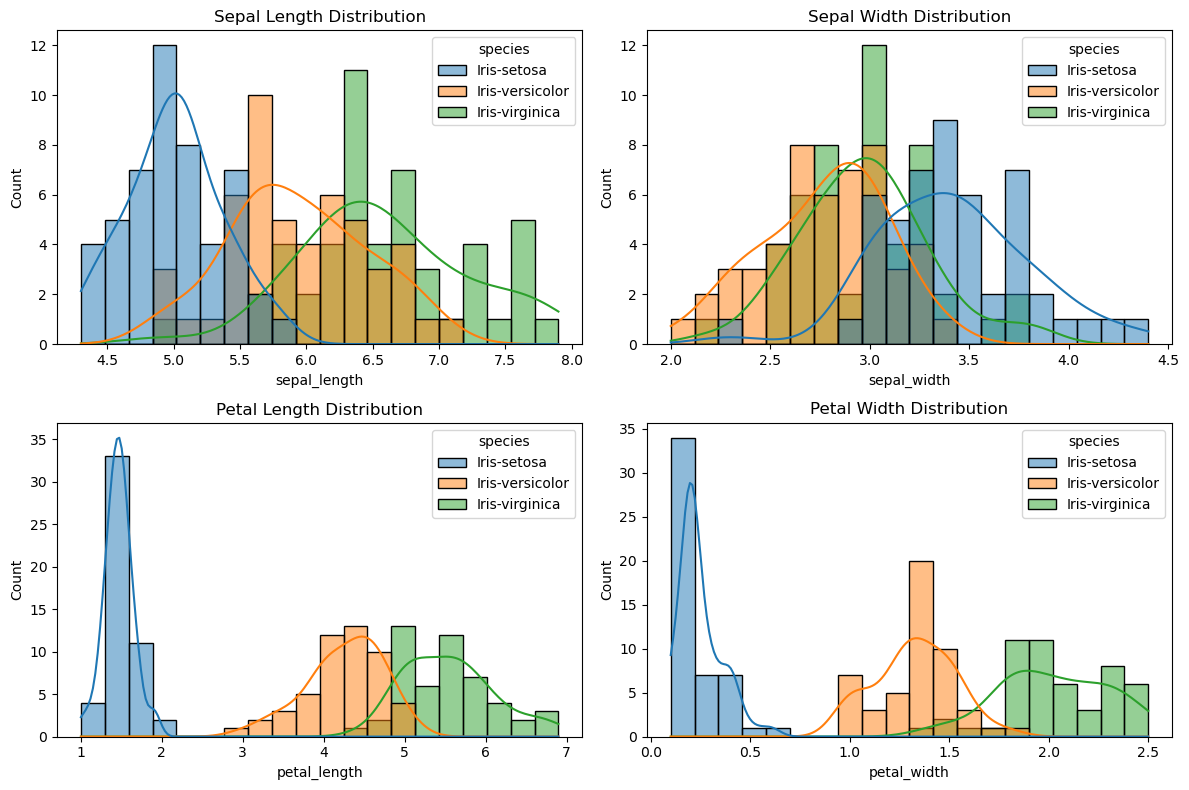

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
titles = ["Sepal Length Distribution", "Sepal Width Distribution", 
          "Petal Length Distribution", "Petal Width Distribution"]

for i, ax in enumerate(axes.flat):
    sns.histplot(iris, x = features[i], hue="species", kde=True, bins=20, ax=ax)
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()

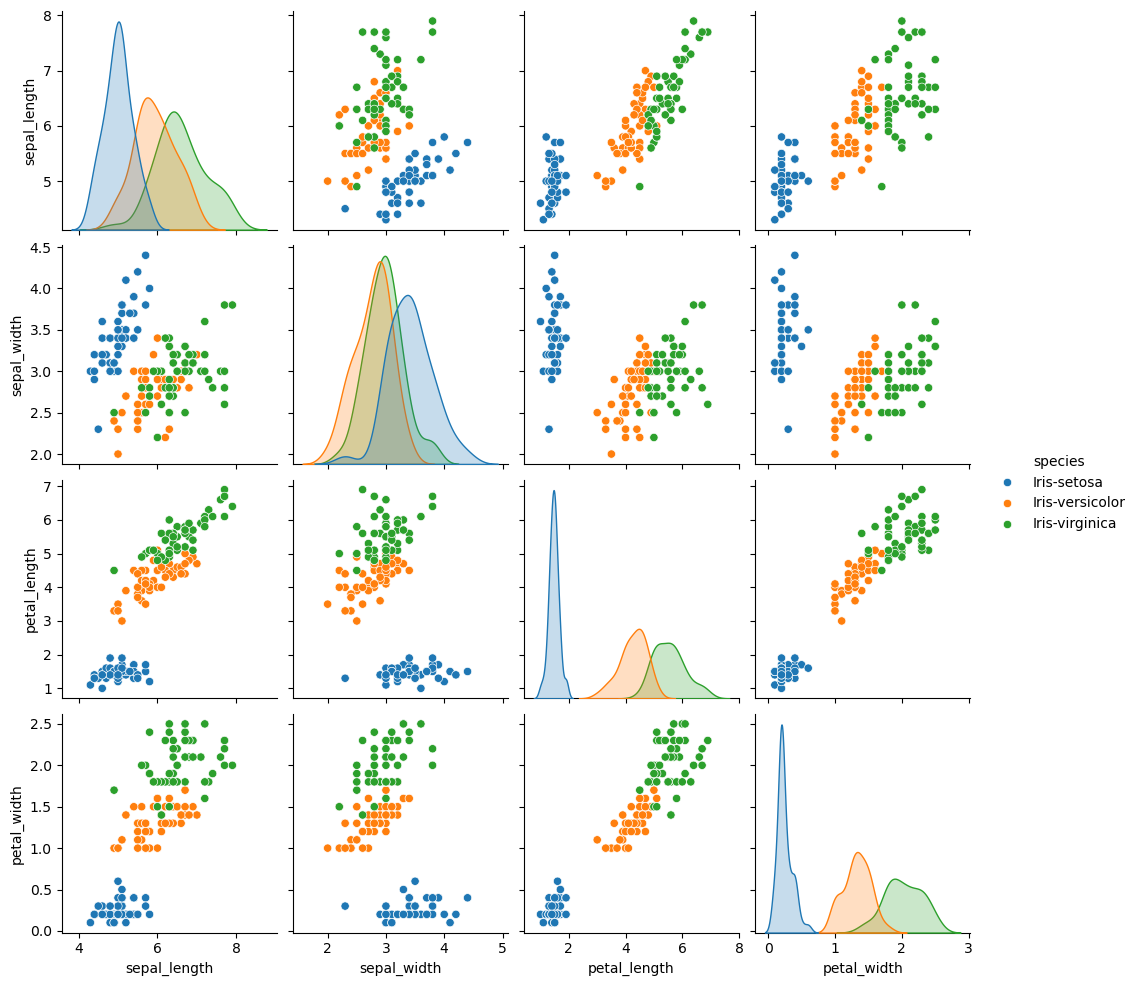

In [8]:
sns.pairplot(iris, hue="species", diag_kind="kde")
plt.show()
%matplotlib inline

In [9]:
X = iris.drop(columns=['species'])
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

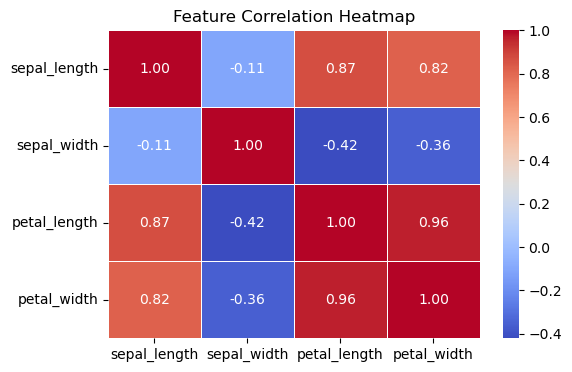

In [10]:
correlation = X.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Model Accuracy: 1.0000

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



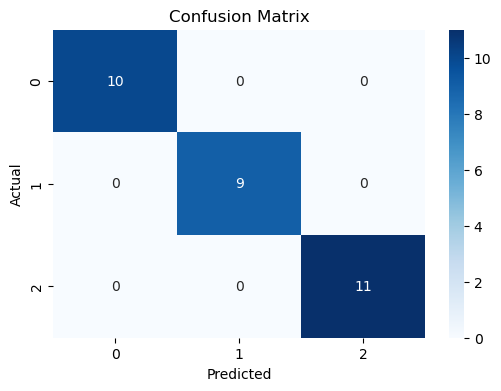

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_code'] = iris['species'].map(species_map)
iris.dtypes

mean = iris.groupby('species').mean()
mean

,sepal_length,sepal_width,petal_length,petal_width,species_code
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.0
Iris-versicolor,5.936,2.770,4.260,1.326,1.0
Iris-virginica,6.588,2.974,5.552,2.026,2.0


In [32]:
def get_input(prompt, min_val, max_val):
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            print(f"Value must be between {min_val} and {max_val}.")
        except ValueError:
            print("Invalid input! Enter a number.")

if 'model' not in globals():
    print("\nModel not found. Train the model first.")
else:
    while True:
        print("\nEnter flower measurements:")

        user_sample = np.array([[get_input(f"{name} ({min_val}-{max_val}): ", min_val, max_val)
                                for name, min_val, max_val in [
                                    ("Sepal Length", 4.3, 7.9), 
                                    ("Sepal Width", 2.0, 4.4), 
                                    ("Petal Length", 1.0, 6.9), 
                                    ("Petal Width", 0.1, 2.5)
                                ]]])

        prediction = model.predict(pd.DataFrame(user_sample, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]))
        print(f"\nPredicted species: {prediction[0]}")

        if input("\nEnter another? (yes/no): ").strip().lower() != 'yes':
            print("Exiting...")
            break


Enter flower measurements:


Sepal Length (4.3-7.9):  5
Sepal Width (2.0-4.4):  4
Petal Length (1.0-6.9):  1
Petal Width (0.1-2.5):  02



Predicted species: Iris-setosa



Enter another? (yes/no):  no


Exiting...
